<a href="https://colab.research.google.com/github/taylorec/Ecommerce-Analytics-with-Python/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google BigQuery - thelook_ecommerce database
> Data Tables: distribution_centers, events, inventory_items, order_items, orders, products, and users

> Objective of this project: gather data from the orders, users, order_items and products tables into a single dataframe to explore the features listed below and to find insights into customer demand.

        order id,
        user id,
        ship to country,
        customer age,
        customer gender,
        product id,
        product sales price,
        order shipped from DC
        product cost,
        product category,
        product department,
        product profit margin

> Insights:
 >> Sales growth was linearly from 2019 to 2022 and exponential in 2023.

 >> There is no correlation between customer age and sales volume.

 >> Blazers & Jackets have the highest profit margins in the clothing category at 62% while Socks have the lowest at 40%.

 >> Orders shipping out of the Texas DC have the highest profit margins at 53.3% while the South Carolina DC is the lowest at 50.5%.

> Google Data Studio Dashboard link: https://lookerstudio.google.com/s/qnEJbtUE_ug


In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'sixth-flag-316719'

In [ ]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

In [ ]:
dc = client.query('''
SELECT
        *
FROM
        `bigquery-public-data.thelook_ecommerce.distribution_centers`
''' ).to_dataframe()

In [ ]:
# Ecommerce Distribution Centers

dc

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [ ]:
dc['state'] = dc['name'].apply(lambda name: name[-2:])

In [ ]:
dc

,id,name,latitude,longitude,state
0,1,Memphis TN,35.1174,-89.9711,TN
1,2,Chicago IL,41.8369,-87.6847,IL
2,3,Houston TX,29.7604,-95.3698,TX
3,4,Los Angeles CA,34.0500,-118.2500,CA
4,5,New Orleans LA,29.9500,-90.0667,LA
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,NJ
6,7,Philadelphia PA,39.9500,-75.1667,PA
7,8,Mobile AL,30.6944,-88.0431,AL
8,9,Charleston SC,32.7833,-79.9333,SC
9,10,Savannah GA,32.0167,-81.1167,GA


In [ ]:
orders_info = client.query('''
SELECT
        orders.order_id,
        orders.user_id,
        users.country,
        users.age,
        users.gender,
        order_items.product_id,
        order_items.sale_price,
        FORMAT_DATE('%m/%Y', CAST(order_items.shipped_at AS DATE)) as shipped_at,
        products.cost,
        products.category,
        products.department,
        products.distribution_center_id,
FROM
        `bigquery-public-data.thelook_ecommerce.orders` orders
JOIN
        `bigquery-public-data.thelook_ecommerce.users` users ON orders.user_id = users.id
JOIN
        `bigquery-public-data.thelook_ecommerce.order_items` order_items ON orders.order_id = order_items.order_id
JOIN
        `bigquery-public-data.thelook_ecommerce.products` products ON order_items.product_id = products.id
''' ).to_dataframe()

In [ ]:
# Customer Orders
orders = orders_info.copy()
orders.head(10)

,order_id,user_id,country,age,gender,product_id,sale_price,shipped_at,cost,category,department,distribution_center_id
0,929,736,Brasil,12,F,4242,98.000000,None,54.390000,Jeans,Women,7
1,1026,824,Brasil,12,F,1992,12.590000,None,5.363340,Fashion Hoodies & Sweatshirts,Women,9
2,2410,1954,United States,12,F,10067,25.000000,None,15.700000,Sleep & Lounge,Women,8
3,3804,3030,Brasil,12,F,6387,34.900002,None,18.008401,Shorts,Women,5
4,3804,3030,Brasil,12,F,2327,66.500000,None,32.984000,Fashion Hoodies & Sweatshirts,Women,6
5,4126,3302,United States,12,F,3411,39.950001,None,18.656650,Dresses,Women,5
6,4228,3380,Brasil,12,F,15121,14.980000,None,7.070560,Maternity,Women,3
7,4663,3737,United States,12,F,1800,48.000000,None,20.496000,Fashion Hoodies & Sweatshirts,Women,8
8,4664,3737,United States,12,F,636,18.969999,None,10.509380,Tops & Tees,Women,6
9,5036,4058,United States,12,F,5677,11.970000,None,6.679260,Pants & Capris,Women,6


In [ ]:
orders.info()

# 180,692 rows, 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180693 entries, 0 to 180692
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                180693 non-null  Int64  
 1   user_id                 180693 non-null  Int64  
 2   country                 180693 non-null  object 
 3   age                     180693 non-null  Int64  
 4   gender                  180693 non-null  object 
 5   product_id              180693 non-null  Int64  
 6   sale_price              180693 non-null  float64
 7   shipped_at              117409 non-null  object 
 8   cost                    180693 non-null  float64
 9   category                180693 non-null  object 
 10  department              180693 non-null  object 
 11  distribution_center_id  180693 non-null  Int64  
dtypes: Int64(5), float64(2), object(5)
memory usage: 17.4+ MB


In [ ]:
orders.isna().sum()

# 63,284 orders have not yet shipped

order_id                      0
user_id                       0
country                       0
age                           0
gender                        0
product_id                    0
sale_price                    0
shipped_at                63284
cost                          0
category                      0
department                    0
distribution_center_id        0
dtype: int64

In [ ]:
import pandas as pd
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])

In [ ]:
orders.describe()

,order_id,user_id,age,product_id,sale_price,cost,distribution_center_id
count,180693.0,180693.0,180693.0,180693.0,180693.000000,180693.000000,180693.0
mean,62305.092688,50079.281251,41.103363,15297.141583,59.480940,28.633021,4.996779
std,35939.623581,28857.823787,17.070952,8417.898533,65.926112,30.644893,2.901117
min,1.0,2.0,12.0,1.0,0.020000,0.008300,1.0
25%,31208.0,25149.0,26.0,8010.0,24.900000,11.414000,2.0
50%,62305.0,50151.0,41.0,15999.0,39.990002,19.875031,5.0
75%,93450.0,75066.0,56.0,22579.0,69.949997,34.608089,8.0
max,124538.0,100000.0,70.0,29120.0,999.000000,557.151002,10.0


In [ ]:
orders.describe(include='object')

,country,gender,category,department
count,180693,180693,180693,180693
unique,15,2,26,2
top,China,M,Intimates,Men
freq,61083,90412,13291,90412


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180693 entries, 0 to 180692
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                180693 non-null  Int64         
 1   user_id                 180693 non-null  Int64         
 2   country                 180693 non-null  object        
 3   age                     180693 non-null  Int64         
 4   gender                  180693 non-null  object        
 5   product_id              180693 non-null  Int64         
 6   sale_price              180693 non-null  float64       
 7   shipped_at              117409 non-null  datetime64[ns]
 8   cost                    180693 non-null  float64       
 9   category                180693 non-null  object        
 10  department              180693 non-null  object        
 11  distribution_center_id  180693 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1)

In [ ]:
# counts per country

orders.country.value_counts()

China             61083
United States     40461
Brasil            26307
South Korea        9701
France             8792
United Kingdom     8689
Germany            7499
Spain              7151
Japan              4437
Australia          3854
Belgium            2187
Poland              495
Colombia             29
Austria               5
Deutschland           3
Name: country, dtype: int64

In [ ]:
dc[['id', 'state']]

,id,state
0,1,TN
1,2,IL
2,3,TX
3,4,CA
4,5,LA
5,6,NJ
6,7,PA
7,8,AL
8,9,SC
9,10,GA


In [ ]:
# Adding Distribution Centers to orders dataset

orders['dc_state'] = orders['distribution_center_id'].map({1:'TN', 2:'IL', 3:'TX', 4:'CA', 5:'LA', 6:'NJ', 7:'PA', 8:'AL', 9:'SC', 10:'GA'})

In [ ]:
orders['sale_price'] = orders['sale_price'].apply(lambda p: round(p,2))

In [ ]:
orders['cost'] = orders['cost'].apply(lambda p: round(p,2))

In [ ]:
orders['profit'] = orders['sale_price'] - orders['cost']

In [ ]:
orders['profit'] = orders['profit'].apply(lambda p: round(p,2))

In [ ]:
orders['profit_margin'] = orders['profit'] / orders['sale_price']

In [ ]:
orders['profit_margin'] = orders['profit_margin'].apply(lambda p: round(p,2))

In [ ]:
orders.head()

,order_id,user_id,country,age,gender,product_id,sale_price,shipped_at,cost,category,department,distribution_center_id,dc_state,profit,profit_margin
0,929,736,Brasil,12,F,4242,98.00,NaT,54.39,Jeans,Women,7,PA,43.61,0.45
1,1026,824,Brasil,12,F,1992,12.59,NaT,5.36,Fashion Hoodies & Sweatshirts,Women,9,SC,7.23,0.57
2,2410,1954,United States,12,F,10067,25.00,NaT,15.70,Sleep & Lounge,Women,8,AL,9.30,0.37
3,3804,3030,Brasil,12,F,6387,34.90,NaT,18.01,Shorts,Women,5,LA,16.89,0.48
4,3804,3030,Brasil,12,F,2327,66.50,NaT,32.98,Fashion Hoodies & Sweatshirts,Women,6,NJ,33.52,0.50


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180693 entries, 0 to 180692
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                180693 non-null  Int64         
 1   user_id                 180693 non-null  Int64         
 2   country                 180693 non-null  object        
 3   age                     180693 non-null  Int64         
 4   gender                  180693 non-null  object        
 5   product_id              180693 non-null  Int64         
 6   sale_price              180693 non-null  float64       
 7   shipped_at              117409 non-null  datetime64[ns]
 8   cost                    180693 non-null  float64       
 9   category                180693 non-null  object        
 10  department              180693 non-null  object        
 11  distribution_center_id  180693 non-null  Int64         
 12  dc_state                180693

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


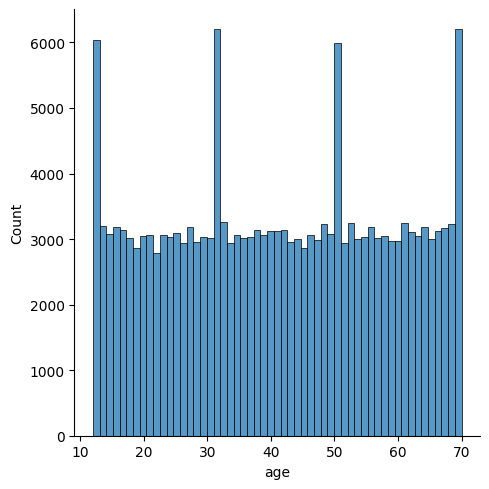

In [ ]:
# age distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['age'],kde=False)

<Axes: xlabel='gender', ylabel='count'>

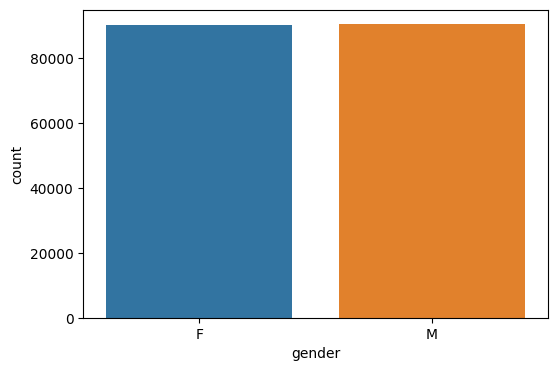

In [ ]:
# Comparing number of orders by gender

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=orders)

In [ ]:
orders['gender'].value_counts()

M    90412
F    90281
Name: gender, dtype: int64

In [ ]:
# average customer age by gender

orders.groupby('gender')['age'].mean()

gender
F    41.140074
M    41.066706
Name: age, dtype: Float64

In [ ]:
# number of different product id's

orders['product_id'].nunique()

29048

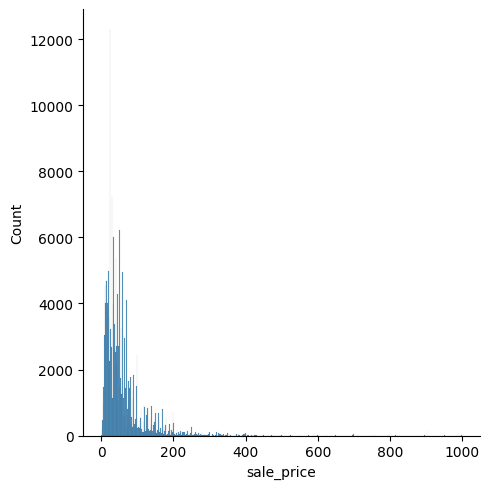

In [ ]:
# distribution of order values

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['sale_price'],kde=False)

In [ ]:
orders['sale_price'].max()

999.0

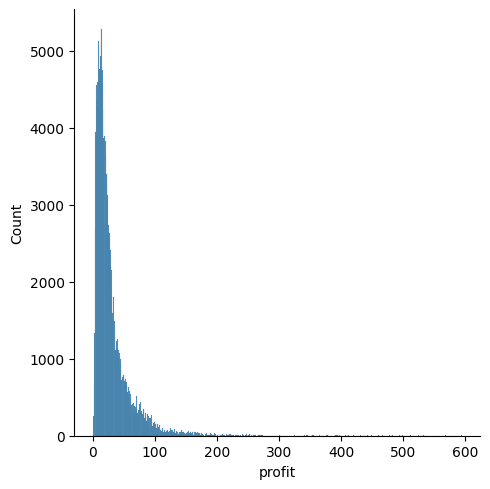

In [ ]:
# sales profit distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(orders['profit'],kde=False)

In [ ]:
orders['profit'].max()

594.4

In [ ]:
orders['profit'].min()

0.01

In [ ]:
# average sales price by gender

orders.groupby('gender')['sale_price'].mean()

gender
F    55.993289
M    62.963538
Name: sale_price, dtype: float64

In [ ]:
# Number of customer orders by category

orders['category'].value_counts().sort_values(ascending=False)

Intimates                        13291
Jeans                            12780
Fashion Hoodies & Sweatshirts    11814
Tops & Tees                      11795
Swim                             11429
Shorts                           11132
Sleep & Lounge                   11073
Sweaters                         10919
Accessories                       9923
Outerwear & Coats                 9044
Active                            8882
Underwear                         7484
Pants                             7230
Socks                             6401
Dresses                           5372
Suits & Sport Coats               5054
Maternity                         5047
Plus                              4347
Socks & Hosiery                   3673
Pants & Capris                    3392
Blazers & Jackets                 3243
Leggings                          3082
Skirts                            2093
Suits                             1091
Jumpsuits & Rompers                890
Clothing Sets            

In [ ]:
orders['department'].value_counts()

Men      90412
Women    90281
Name: department, dtype: int64

In [ ]:
orders.groupby('gender')['department'].value_counts()

# gender and department are the same

gender  department
F       Women         90281
M       Men           90412
Name: department, dtype: int64

<Axes: xlabel='country', ylabel='count'>

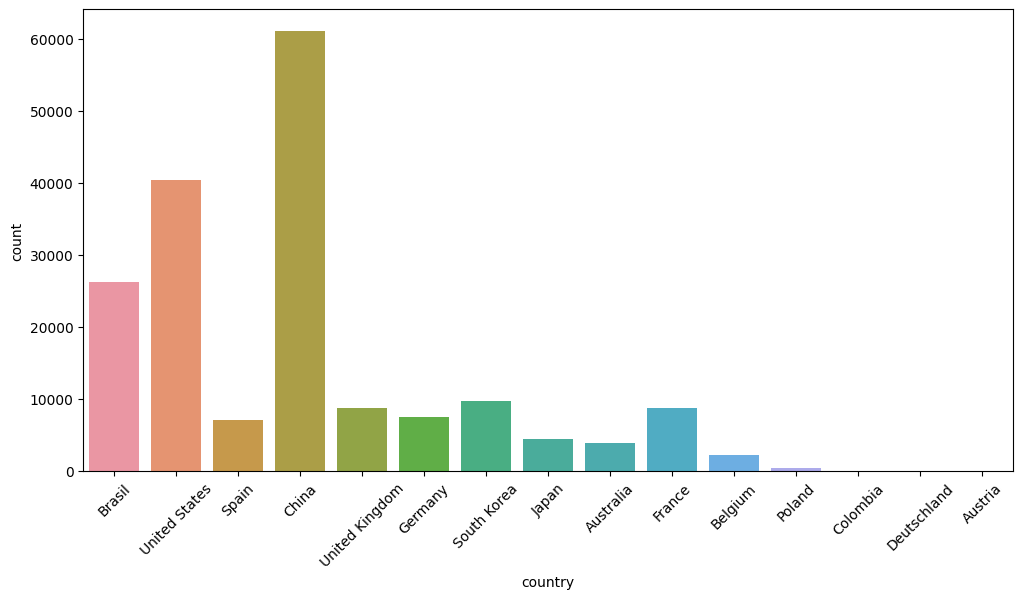

In [ ]:
# bar graph showing number of customer purchases by country

plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x='country', data=orders)

In [ ]:
# Number of purchases from China grouped by category

orders[orders['country']=='China']['category'].value_counts()

Intimates                        4550
Jeans                            4422
Tops & Tees                      3983
Fashion Hoodies & Sweatshirts    3969
Swim                             3788
Shorts                           3715
Sleep & Lounge                   3702
Sweaters                         3632
Accessories                      3327
Active                           3069
Outerwear & Coats                3034
Underwear                        2577
Pants                            2437
Socks                            2175
Dresses                          1799
Maternity                        1735
Suits & Sport Coats              1691
Plus                             1499
Socks & Hosiery                  1227
Pants & Capris                   1185
Blazers & Jackets                1100
Leggings                         1014
Skirts                            703
Suits                             386
Jumpsuits & Rompers               296
Clothing Sets                      68
Name: catego

In [ ]:
# Number of purchases from the USA grouped by category

orders[orders['country']=='United States']['category'].value_counts()

Intimates                        3044
Jeans                            2827
Fashion Hoodies & Sweatshirts    2662
Tops & Tees                      2648
Swim                             2594
Sleep & Lounge                   2539
Shorts                           2491
Sweaters                         2475
Accessories                      2181
Outerwear & Coats                1992
Active                           1929
Underwear                        1666
Pants                            1601
Socks                            1478
Dresses                          1201
Maternity                        1132
Suits & Sport Coats              1117
Plus                              951
Socks & Hosiery                   815
Blazers & Jackets                 758
Pants & Capris                    719
Leggings                          679
Skirts                            485
Suits                             215
Jumpsuits & Rompers               213
Clothing Sets                      49
Name: catego

In [ ]:
# Number of purchases by category from the women's department

orders[orders['department']=='Women']['category'].value_counts()

Intimates                        13291
Dresses                           5372
Fashion Hoodies & Sweatshirts     5099
Maternity                         5047
Swim                              5030
Jeans                             5010
Sleep & Lounge                    4706
Shorts                            4703
Tops & Tees                       4362
Plus                              4347
Accessories                       4280
Sweaters                          4172
Active                            3827
Socks & Hosiery                   3673
Pants & Capris                    3392
Outerwear & Coats                 3359
Blazers & Jackets                 3243
Leggings                          3082
Skirts                            2093
Suits                             1091
Jumpsuits & Rompers                890
Clothing Sets                      212
Name: category, dtype: int64

In [ ]:
# Number of purchases by category from the Men's department

orders[orders['department']=='Men']['category'].value_counts()

Jeans                            7770
Underwear                        7484
Tops & Tees                      7433
Pants                            7230
Sweaters                         6747
Fashion Hoodies & Sweatshirts    6715
Shorts                           6429
Socks                            6401
Swim                             6399
Sleep & Lounge                   6367
Outerwear & Coats                5685
Accessories                      5643
Active                           5055
Suits & Sport Coats              5054
Name: category, dtype: int64

In [ ]:
# There are 1998 different product id #'s for jeans
orders[orders['category']=='Jeans']['product_id'].value_counts()

21400    16
20559    16
21242    15
21391    15
4771     15
         ..
5036      1
4297      1
4628      1
4942      1
4533      1
Name: product_id, Length: 1998, dtype: Int64

<Axes: xlabel='dc_state', ylabel='count'>

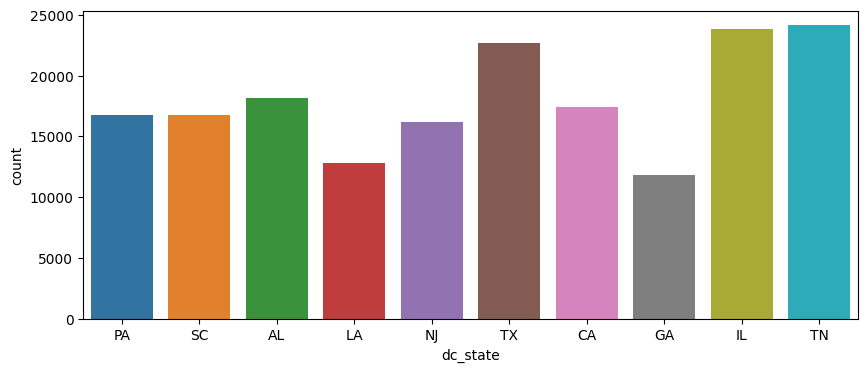

In [ ]:
# bar graph showing number of customer orders by DC

plt.figure(figsize=(10,4))
sns.countplot(x='dc_state', data=orders)

<Axes: xlabel='shipped_at'>

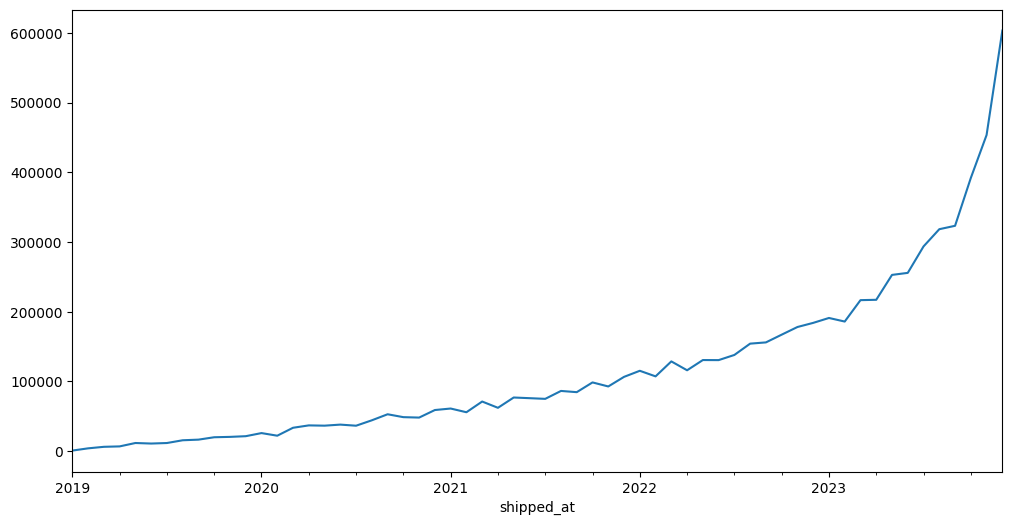

In [ ]:
# Time series plot of sales
plt.figure(figsize=(12,6))
orders.groupby('shipped_at')['sale_price'].sum().plot()

<Axes: xlabel='shipped_at'>

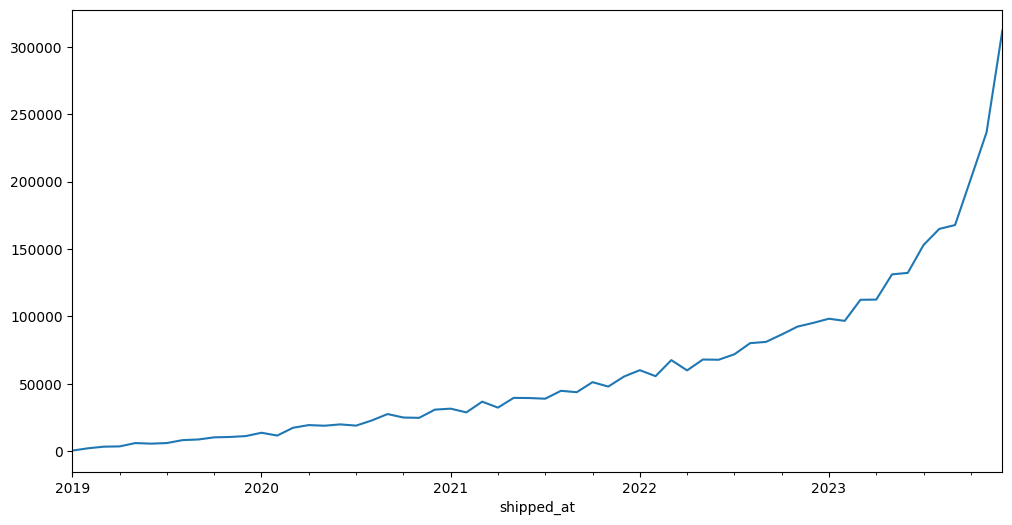

In [ ]:
# Time series plot of profits
plt.figure(figsize=(12,6))
orders.groupby('shipped_at')['profit'].sum().plot()

In [ ]:
# latest date an order shipped

orders['shipped_at'].max()

Timestamp('2023-12-01 00:00:00')

In [ ]:
# first date an order shipped

orders['shipped_at'].min()

Timestamp('2019-01-01 00:00:00')

In [ ]:
# Sales volume by DC

orders.groupby('dc_state')['sale_price'].sum().sort_values()

dc_state
SC     672856.63
GA     782149.12
LA     798437.48
NJ     930128.48
CA     948430.47
PA    1080051.19
AL    1207276.56
IL    1332048.63
TN    1414042.61
TX    1582368.31
Name: sale_price, dtype: float64

In [ ]:
# Profit volume by DC

orders.groupby('dc_state')['profit'].sum().sort_values()

dc_state
SC    340100.49
GA    397289.78
LA    422270.23
NJ    480450.62
CA    489302.32
PA    549362.57
AL    616131.71
IL    696191.50
TN    739584.98
TX    843297.62
Name: profit, dtype: float64

In [ ]:
# Sales volume by country

orders.groupby('country')['sale_price'].sum().sort_values()

country
Deutschland           253.29
Austria               387.13
Colombia             1642.43
Poland              29573.30
Belgium            130091.17
Australia          230600.32
Japan              268529.51
Spain              422438.55
Germany            443079.30
United Kingdom     515611.44
France             526909.56
South Korea        572304.68
Brasil            1576326.72
United States     2385659.59
China             3644382.49
Name: sale_price, dtype: float64

In [ ]:
# Sales volume by age

Age_sales = orders.groupby('age')['sale_price'].sum().sort_values()
Age_sales

age
22    163251.79
45    163894.27
26    171520.07
52    172070.84
19    172223.45
59    174750.80
34    175114.51
18    175125.74
58    175370.85
30    175533.68
28    175884.79
54    175906.93
60    176075.08
47    176142.02
43    176527.87
13    177142.89
55    177678.47
57    178616.87
24    178763.82
36    178840.94
44    178993.03
40    180430.23
21    180682.55
12    181358.74
37    181446.66
50    181453.73
31    181669.27
62    181963.95
41    182123.95
35    182207.13
65    182867.84
29    183394.02
42    183533.29
63    183703.06
51    183792.22
66    184147.82
69    184251.31
49    184329.42
46    184831.27
23    185604.38
68    185766.03
25    186552.89
70    187084.02
53    187966.52
64    188012.87
32    188026.50
16    188547.41
38    188960.27
67    189024.50
33    189163.05
20    189383.68
27    189917.30
15    190180.75
56    190317.53
14    190977.38
17    191245.38
39    191635.07
48    192626.68
61    199182.10
Name: sale_price, dtype: float64

In [ ]:
orders[["age", "sale_price"]].corr()

# no correlation between sales volume and age

,age,sale_price
age,1.000000,-0.002758
sale_price,-0.002758,1.000000


In [ ]:
orders[["profit", "sale_price"]].corr()

# correlation between profit and sale price is very strong

,profit,sale_price
profit,1.000000,0.987531
sale_price,0.987531,1.000000


In [ ]:
# number of unique products per category

orders.groupby('category')['product_id'].nunique()

category
Accessories                      1556
Active                           1431
Blazers & Jackets                 558
Clothing Sets                      37
Dresses                           949
Fashion Hoodies & Sweatshirts    1862
Intimates                        2353
Jeans                            1998
Jumpsuits & Rompers               162
Leggings                          564
Maternity                         893
Outerwear & Coats                1414
Pants                            1040
Pants & Capris                    612
Plus                              755
Shorts                           1757
Skirts                            366
Sleep & Lounge                   1765
Socks                             903
Socks & Hosiery                   664
Suits                             188
Suits & Sport Coats               739
Sweaters                         1735
Swim                             1796
Tops & Tees                      1864
Underwear                        1087
Nam

In [ ]:
# sales volume by category

category_sales = orders.groupby('category')['sale_price'].sum()
category_sales

category
Accessories                       414431.44
Active                            454913.83
Blazers & Jackets                 299143.25
Clothing Sets                      18817.59
Dresses                           448936.33
Fashion Hoodies & Sweatshirts     638954.66
Intimates                         453955.86
Jeans                            1257700.87
Jumpsuits & Rompers                38595.79
Leggings                           83803.86
Maternity                         255009.89
Outerwear & Coats                1314262.75
Pants                             435232.34
Pants & Capris                    183475.65
Plus                              166508.67
Shorts                            509579.26
Skirts                            108633.32
Sleep & Lounge                    537859.29
Socks                             126609.81
Socks & Hosiery                    60718.67
Suits                             126276.18
Suits & Sport Coats               649507.47
Sweaters               

In [ ]:
# profit by category

category_profit = orders.groupby('category')['profit'].sum()
category_profit

category
Accessories                      248686.74
Active                           263956.11
Blazers & Jackets                185608.95
Clothing Sets                      7154.48
Dresses                          246650.60
Fashion Hoodies & Sweatshirts    306444.44
Intimates                        212234.83
Jeans                            584756.90
Jumpsuits & Rompers               18157.40
Leggings                          33625.99
Maternity                        142472.81
Outerwear & Coats                729168.91
Pants                            235330.73
Pants & Capris                    86430.17
Plus                              82956.84
Shorts                           254202.03
Skirts                            65394.29
Sleep & Lounge                   277710.17
Socks                             50191.38
Socks & Hosiery                   36302.85
Suits                             49971.61
Suits & Sport Coats              389216.52
Sweaters                         424312.12
Sw

In [ ]:
# profit margin by category
category_profit/category_sales

category
Accessories                      0.600067
Active                           0.580233
Blazers & Jackets                0.620468
Clothing Sets                    0.380202
Dresses                          0.549411
Fashion Hoodies & Sweatshirts    0.479603
Intimates                        0.467523
Jeans                            0.464941
Jumpsuits & Rompers              0.470450
Leggings                         0.401246
Maternity                        0.558695
Outerwear & Coats                0.554812
Pants                            0.540701
Pants & Capris                   0.471072
Plus                             0.498213
Shorts                           0.498847
Skirts                           0.601973
Sleep & Lounge                   0.516325
Socks                            0.396426
Socks & Hosiery                  0.597886
Suits                            0.395733
Suits & Sport Coats              0.599249
Sweaters                         0.517906
Swim                     

In [ ]:
# sales volume by department

department_sales = orders.groupby('department')['sale_price'].sum()
department_sales

department
Men      5692659.37
Women    5055130.11
Name: sale_price, dtype: float64

In [ ]:
# profit by department

department_profit = orders.groupby('department')['profit'].sum()
department_profit

department
Men      2946287.46
Women    2627694.36
Name: profit, dtype: float64

In [ ]:
# profit margin by department
department_profit/department_sales

department
Men      0.517559
Women    0.519807
dtype: float64

In [ ]:
# profit margin by DC
DC_sales = orders.groupby('dc_state')['sale_price'].sum()
DC_profit = orders.groupby('dc_state')['profit'].sum()
DC_profit/DC_sales

dc_state
AL    0.510348
CA    0.515907
GA    0.507946
IL    0.522647
LA    0.528871
NJ    0.516542
PA    0.508645
SC    0.505458
TN    0.523029
TX    0.532934
dtype: float64

In [ ]:
# profit margin by country
Location_sales = orders.groupby('country')['sale_price'].sum()
Location_profit = orders.groupby('country')['profit'].sum()
Location_profit/Location_sales

country
Australia         0.519657
Austria           0.562757
Belgium           0.518474
Brasil            0.518823
China             0.518514
Colombia          0.492289
Deutschland       0.513206
France            0.518417
Germany           0.518698
Japan             0.520095
Poland            0.511756
South Korea       0.517709
Spain             0.517581
United Kingdom    0.518887
United States     0.518846
dtype: float64

In [ ]:
# return max profit margin
orders['profit_margin'].max()

0.67

In [ ]:
# return min profit margin
orders['profit_margin'].min()

0.33

In [ ]:
# save data set to Google Drive

from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
orders.to_csv('orders.csv')
!cp orders.csv "drive/My Drive/Projects/BigQuery/Ecommerce/"